![Example image](https://upload.wikimedia.org/wikipedia/commons/0/02/Northeastern_Wordmark.svg)

# Linear Regression

Copyright: Prof. Shanu Sushmita

### Predict Student Scores Based on Study Hours

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
# Sample data of study hours and corresponding scores
data = {
    'Hours': [1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6],
    'Scores': [20, 30, 35, 50, 45, 60, 70, 75, 80, 90]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df)


   Hours  Scores
0    1.5      20
1    2.0      30
2    2.5      35
3    3.0      50
4    3.5      45
5    4.0      60
6    4.5      70
7    5.0      75
8    5.5      80
9    6.0      90


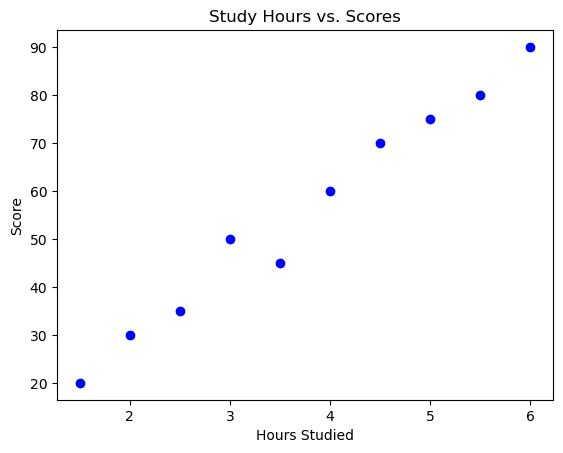

In [14]:
# Scatter plot to visualize the relationship between hours and scores
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Study Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [15]:
# Define input (X) and output (y)
X = df[['Hours']]  # Independent variable (Hours studied)
y = df['Scores']   # Dependent variable (Scores)

In [16]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print predicted scores
print("Predicted Scores:", y_pred)

Predicted Scores: [82.93103448 28.31896552]


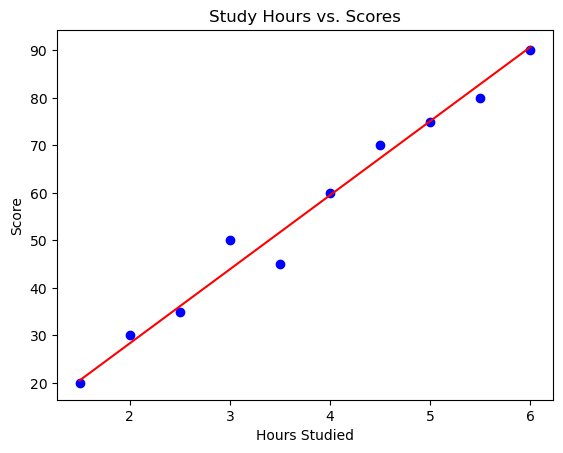

In [19]:
# Plot the regression line on top of the scatter plot
plt.scatter(X, y, color='blue')  # Original data
plt.plot(X, model.predict(X), color='red')  # Regression line
plt.title('Study Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

### California Housing Prediction

In [20]:
from sklearn.datasets import fetch_california_housing

In [21]:
# Load California housing dataset
california_housing = fetch_california_housing()

In [22]:
# We can have a first look at the available description of the dataset

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [23]:
# Convert to pandas DataFrame for easier manipulation
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(data=california_housing.target, columns=['target'])

In [24]:
# Concatenate features and target into a single DataFrame
df = pd.concat([data, target], axis=1)

In [25]:
# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

In [26]:
# Initialize Linear Regression model
model = LinearRegression()

In [27]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [28]:
# Initialize lists to store metrics
rmse_scores = []
mae_scores = []
r2_scores = []

In [29]:
# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calculate average scores
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)
avg_r2 = np.mean(r2_scores)

In [30]:
print("Average RMSE:", avg_rmse)
print("Average MAE:", avg_mae)
print("Average R^2:", avg_r2)

Average RMSE: 0.7265250485193588
Average MAE: 0.531505251553053
Average R^2: 0.6035381394351562
